In [16]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplhep

mplhep.style.use(["LHCbTex2"])
input_tree = uproot.open({
    "/work/cetin/LHCb/reco_tuner/data/tracking_losses_ntuple_B_BJpsi_def_selected.root":
    "Selected"
})
array = input_tree.arrays()

array["dSlope_yEndT"] = array["ideal_state_9410_ty"] - array[
    "ideal_state_770_ty"]
array["dSlope_yEndT_abs"] = abs(array["dSlope_yEndT"])

array["dSlope_xEndT"] = array["ideal_state_9410_tx"] - array[
    "ideal_state_770_tx"]
array["dSlope_xEndT_abs"] = abs(array["dSlope_xEndT"])
array["x_EndT_abs"] = abs(array["ideal_state_9410_x"])
array["x_EndVelo_abs"] = abs(array["ideal_state_770_x"])

array["y_EndT_abs"] = abs(array["ideal_state_9410_y"])
array["y_EndVelo_abs"] = abs(array["ideal_state_770_y"])

array["z_mag_xEndT"] = (
    array["ideal_state_770_x"] - array["ideal_state_9410_x"] -
    array["ideal_state_770_tx"] * array["ideal_state_770_z"] +
    array["ideal_state_9410_tx"] *
    array["ideal_state_9410_z"]) / array["dSlope_xEndT"]

array["z_mag_corr"] = array["z_mag_xEndT"] - array["match_zmag"]

sel_array = array[(array["z_mag_xEndT"] < 5800)
                  & (array["z_mag_xEndT"] > 5000)]
                #   & (array["match_chi2"] < 5)]

SyntaxError: incomplete input (4052887367.py, line 38)

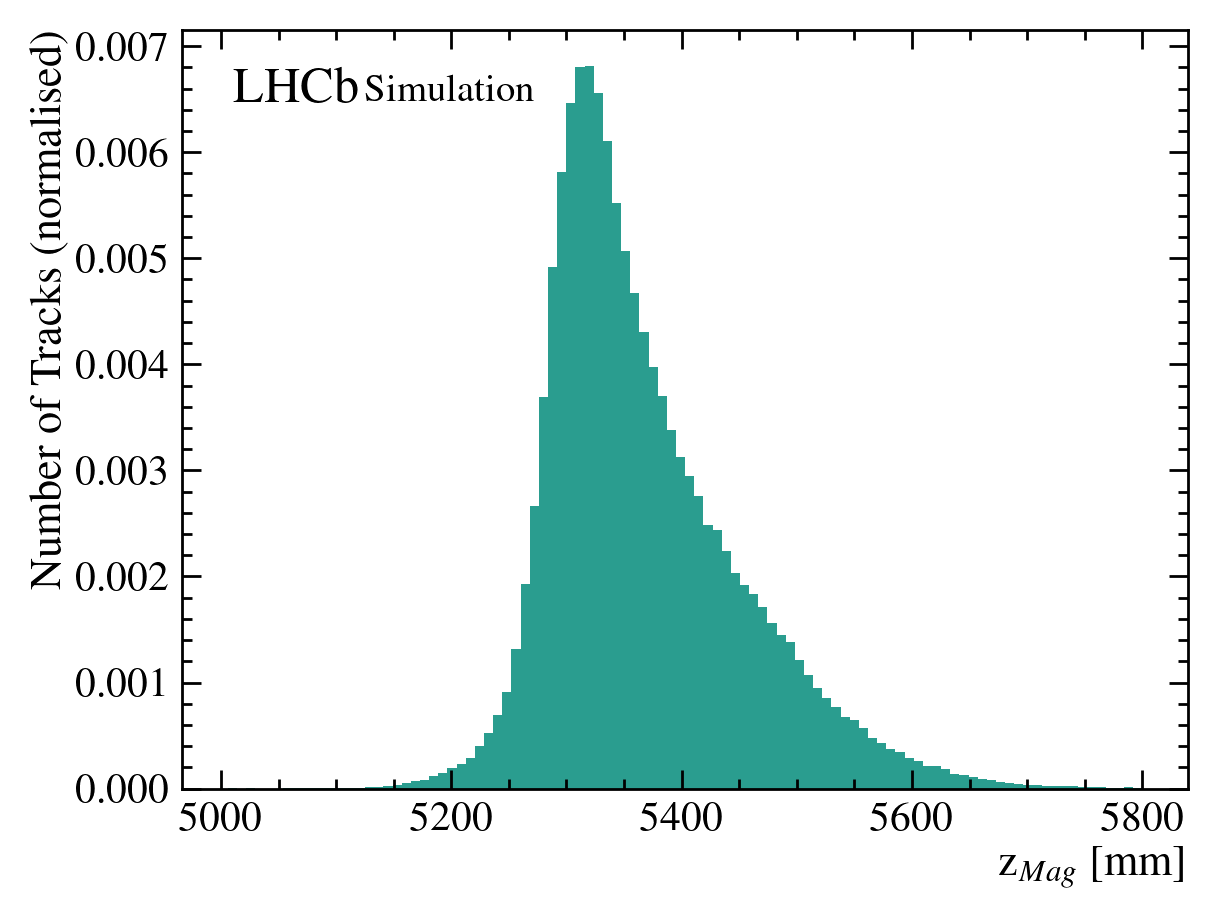

In [ ]:
fig = plt.figure()
plt.hist(
    sel_array["z_mag_xEndT"],
    bins=100,
    # range=[5100, 5700],
    color="#2A9D8F",
    density=True,
)
plt.xlabel(r"z$_{Mag}$ [mm]")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation")
plt.show()
# plt.savefig(
#     "/work/cetin/LHCb/reco_tuner/parameterisations/plots/magnet_kink_dist.pdf",
#     format="PDF",
# )

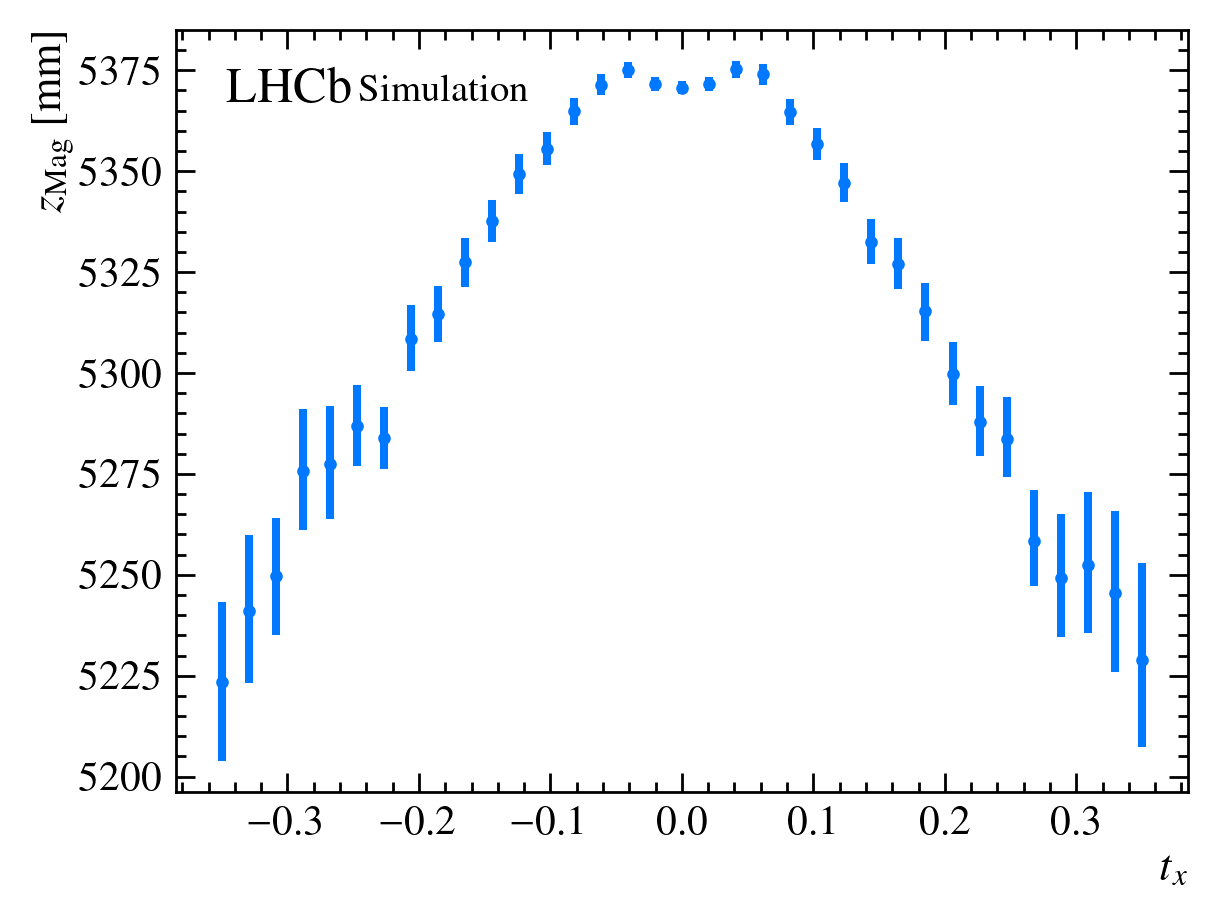

In [ ]:
bins = np.linspace(-0.35, 0.35, 35)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_tx"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(5100, 5700)
plt.xlabel("$t_x$")
plt.ylabel(r"$z_{\mathrm{Mag}}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()
# plt.savefig(
#     "/work/cetin/LHCb/reco_tuner/parameterisations/plots/magnet_kink_tx_dist.pdf",
#     format="PDF",
# )

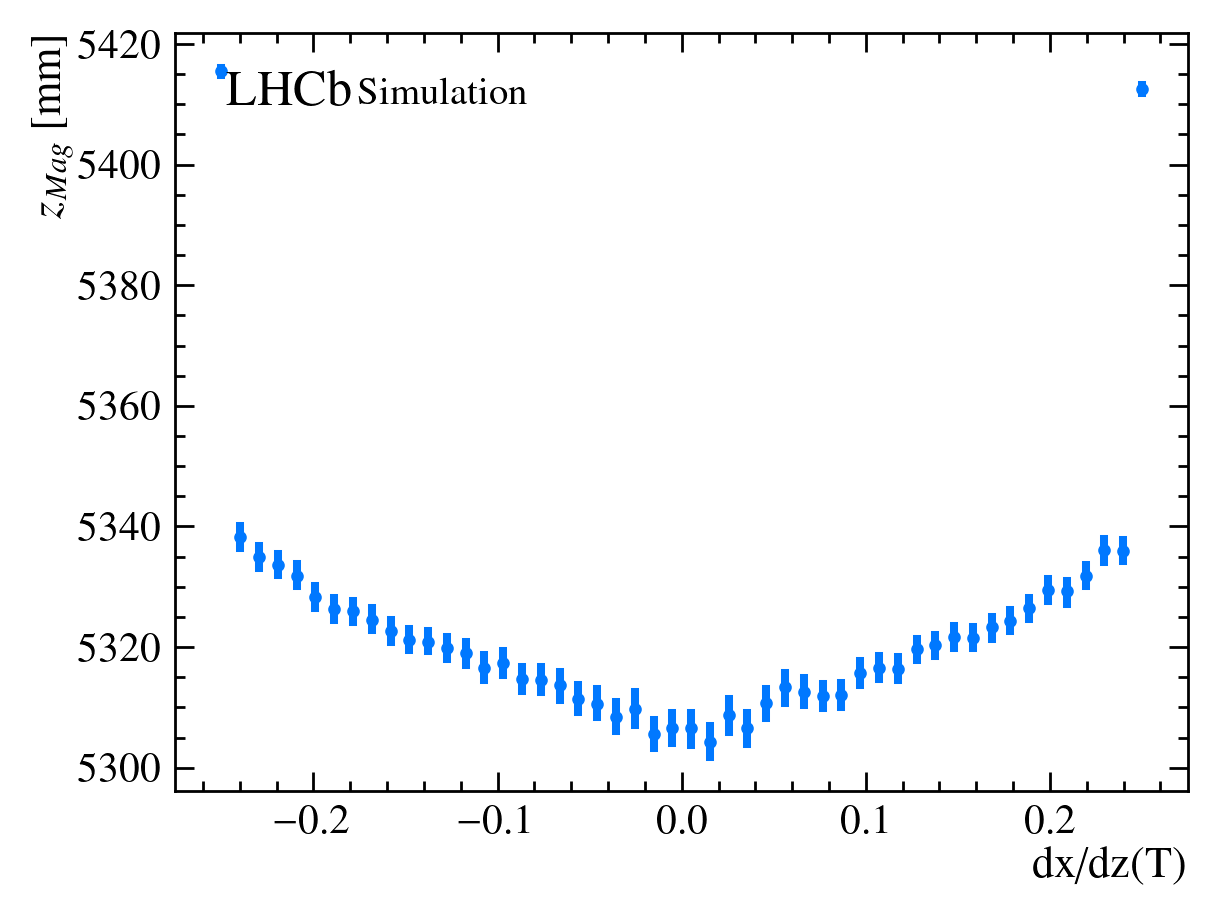

In [ ]:
bins = np.linspace(-0.25, 0.25, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_9410_tx"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(4500, 5700)

plt.xlabel("dx/dz(T)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

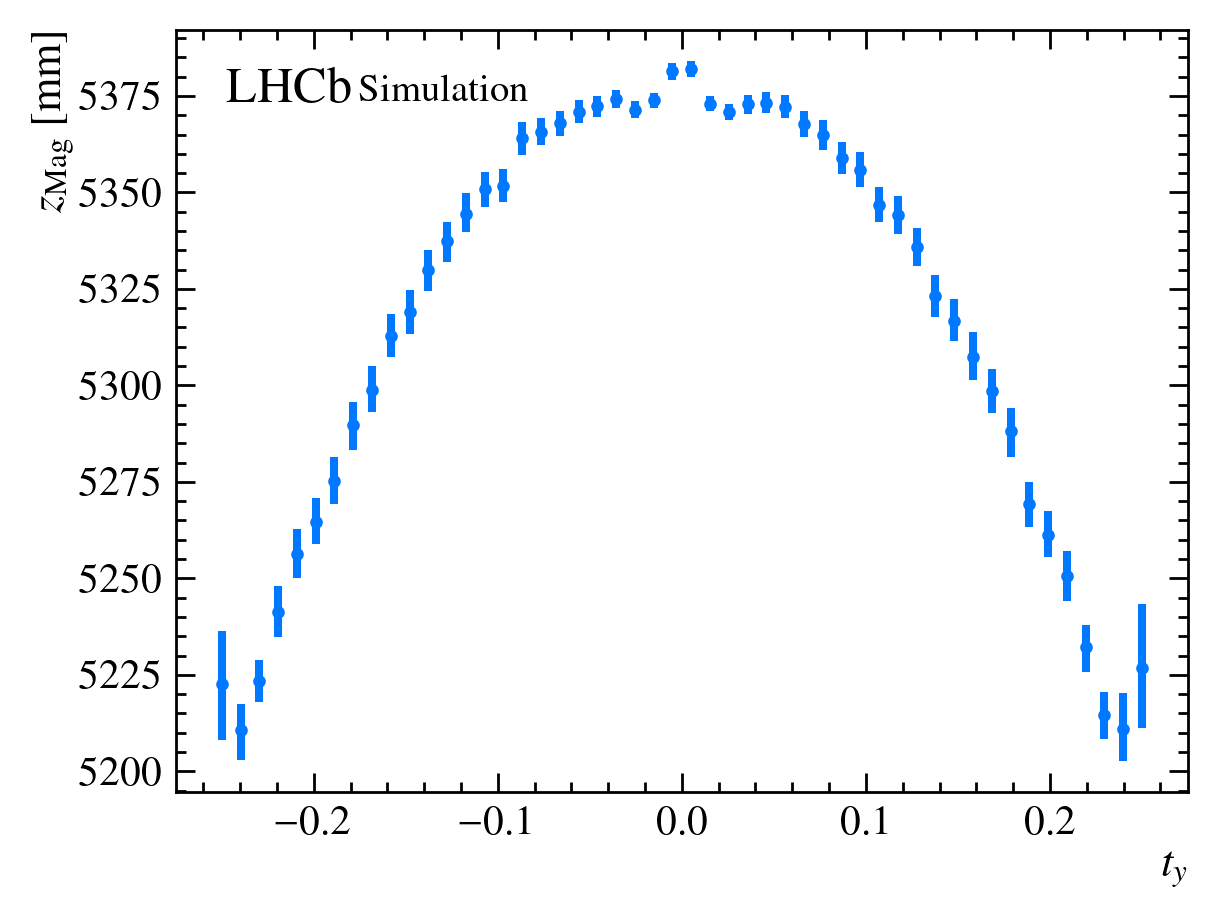

In [ ]:
bins = np.linspace(-0.25, 0.25, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_ty"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(4500, 5700)

plt.xlabel("$t_y$")
plt.ylabel(r"$z_{\mathrm{Mag}}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()
# plt.savefig(
#     "/work/cetin/LHCb/reco_tuner/parameterisations/plots/magnet_kink_ty_dist.pdf",
#     format="PDF",
# )

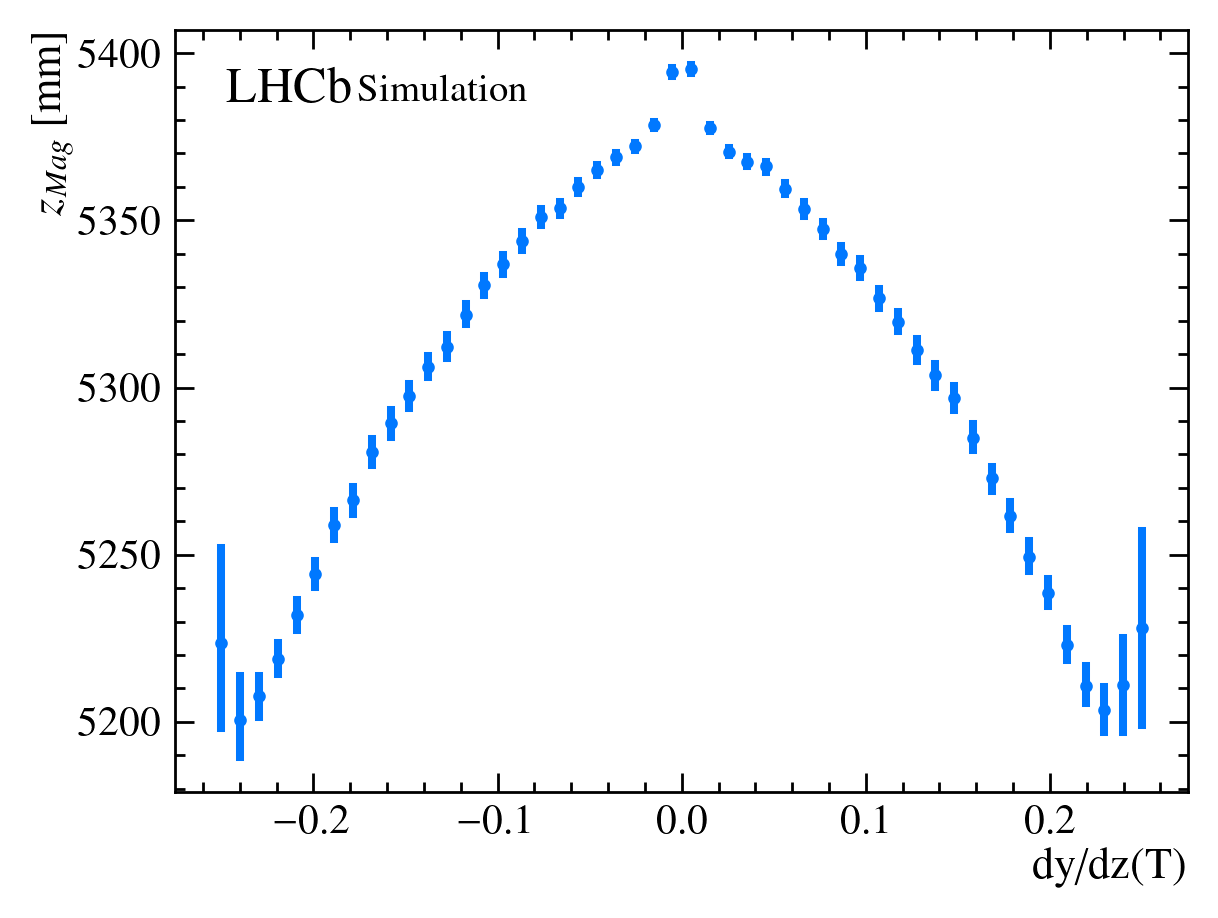

In [ ]:
bins = np.linspace(-0.25, 0.25, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_9410_ty"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(4500, 5700)

plt.xlabel("dy/dz(T)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

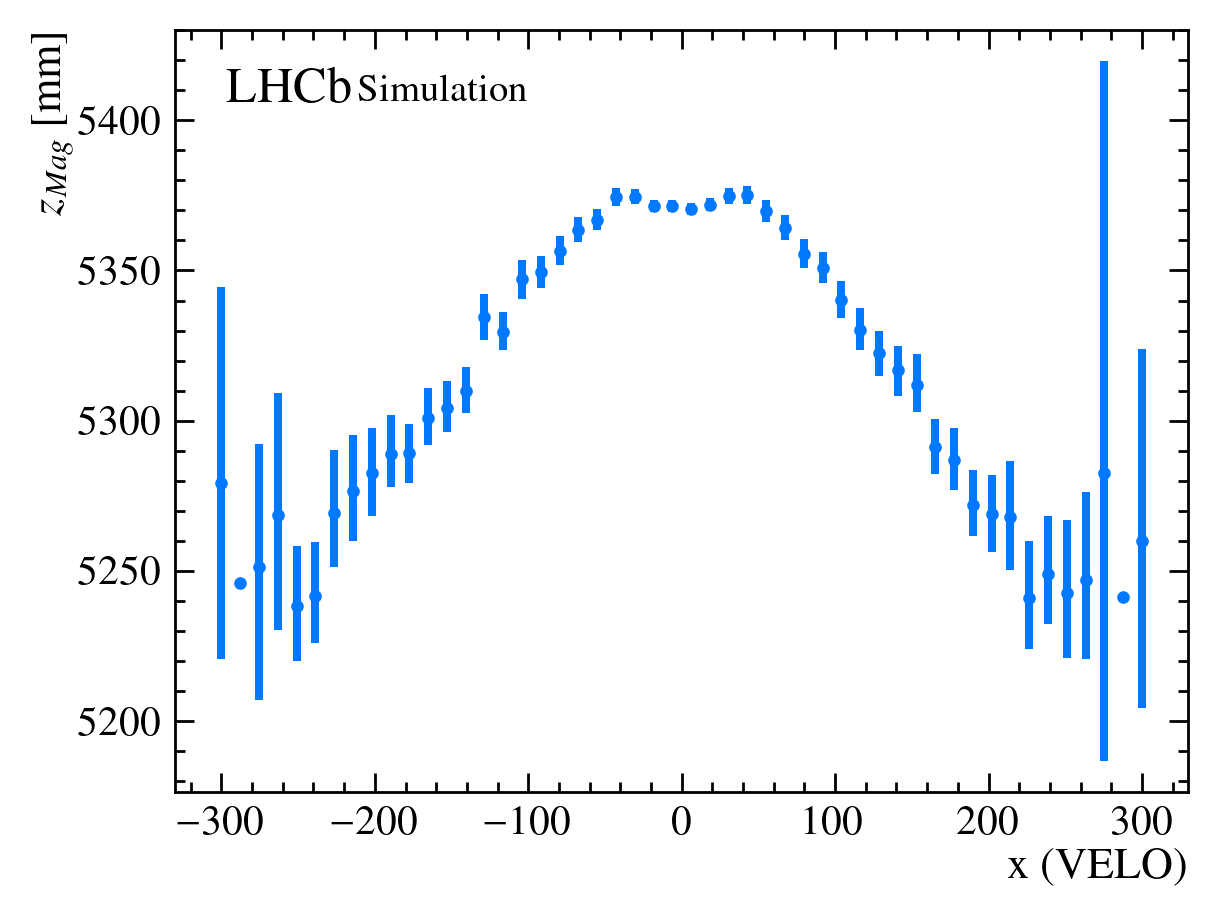

In [ ]:
bins = np.linspace(-300, 300, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_x"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("x (VELO)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

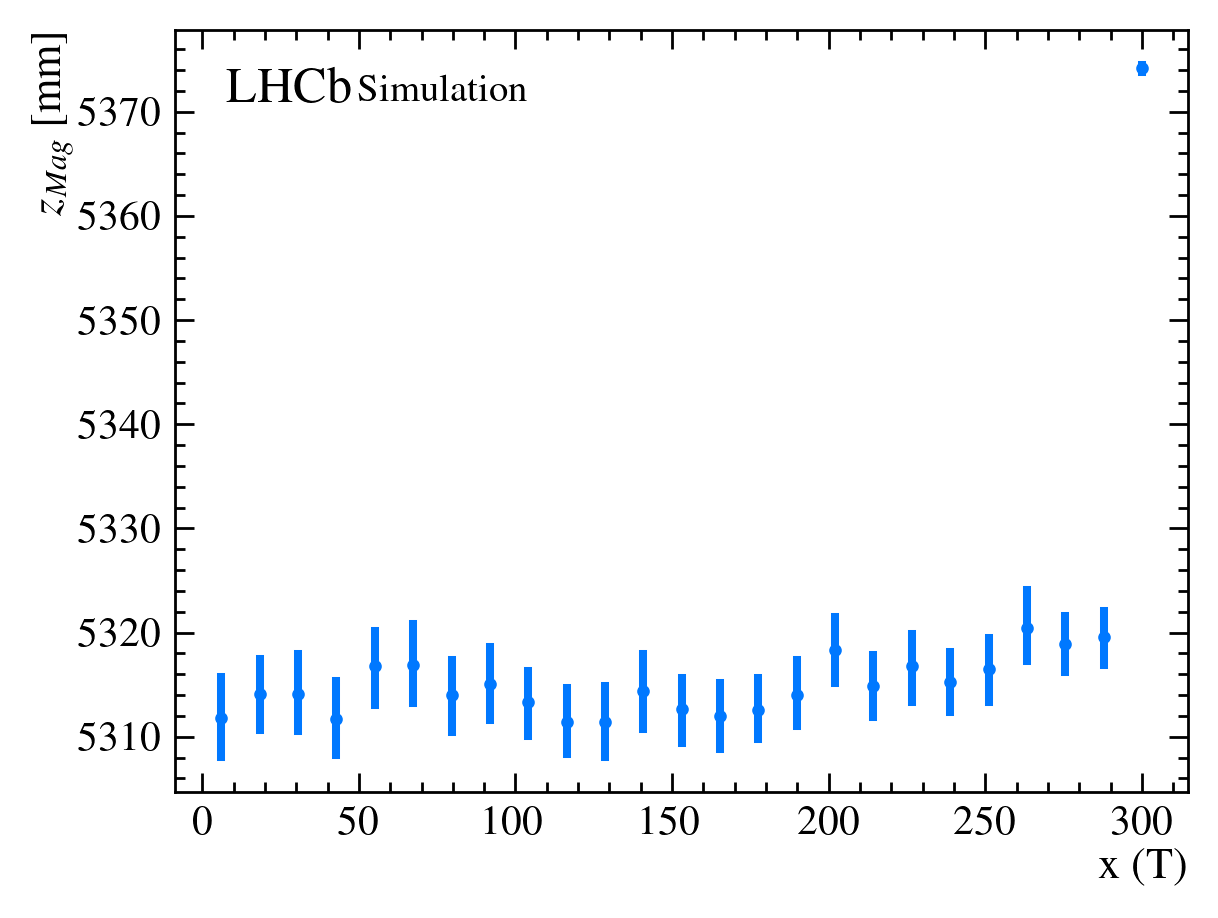

In [ ]:
bins = np.linspace(-300, 300, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["x_EndT_abs"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("x (T)")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

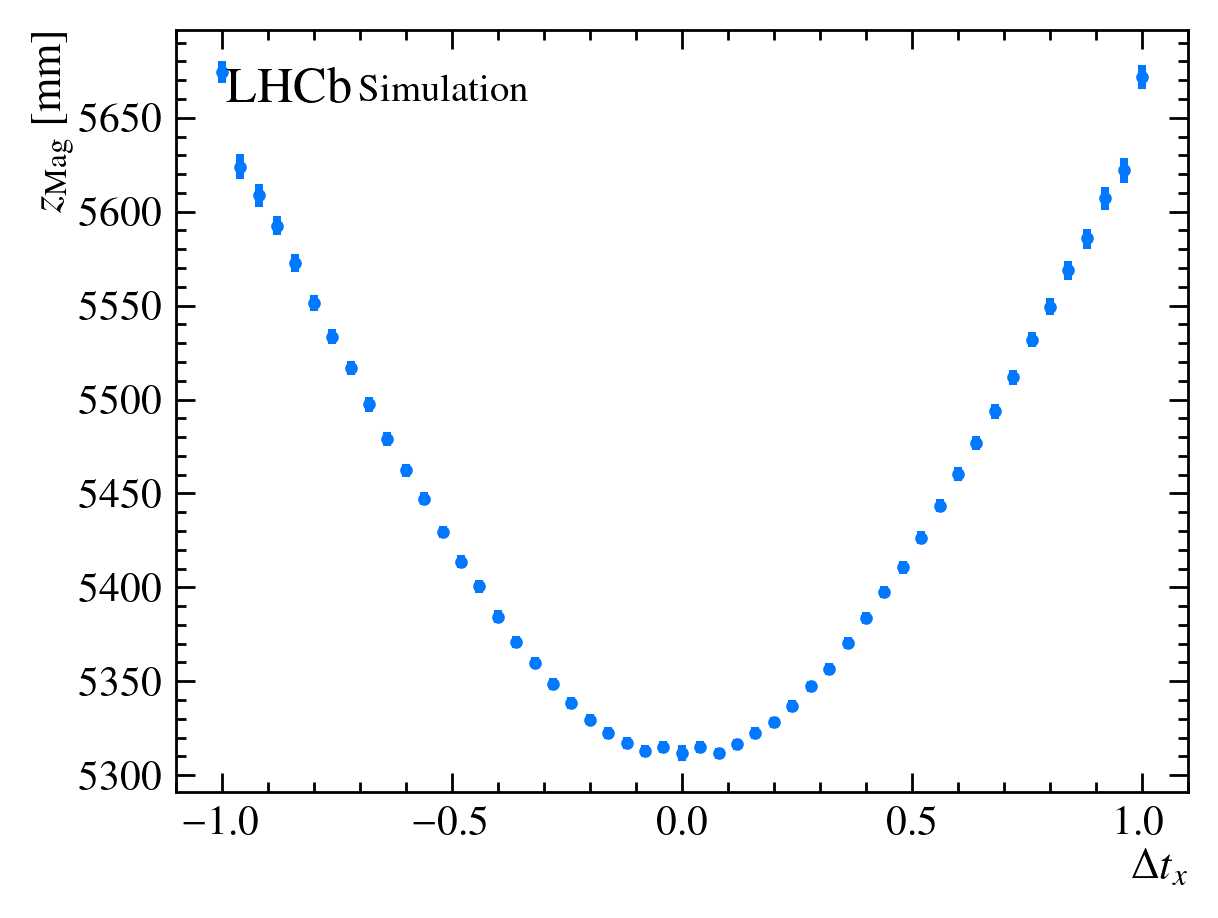

In [ ]:
bins = np.linspace(-1.0, 1.0, 51)
sns.regplot(
    x=ak.to_numpy(sel_array["dSlope_xEndT"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("$\Delta t_x$")
plt.ylabel(r"$z_{\mathrm{Mag}}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()
# plt.savefig(
#     "/work/cetin/LHCb/reco_tuner/parameterisations/plots/magnet_kink_deltatx_dist.pdf",
#     format="PDF",
# )

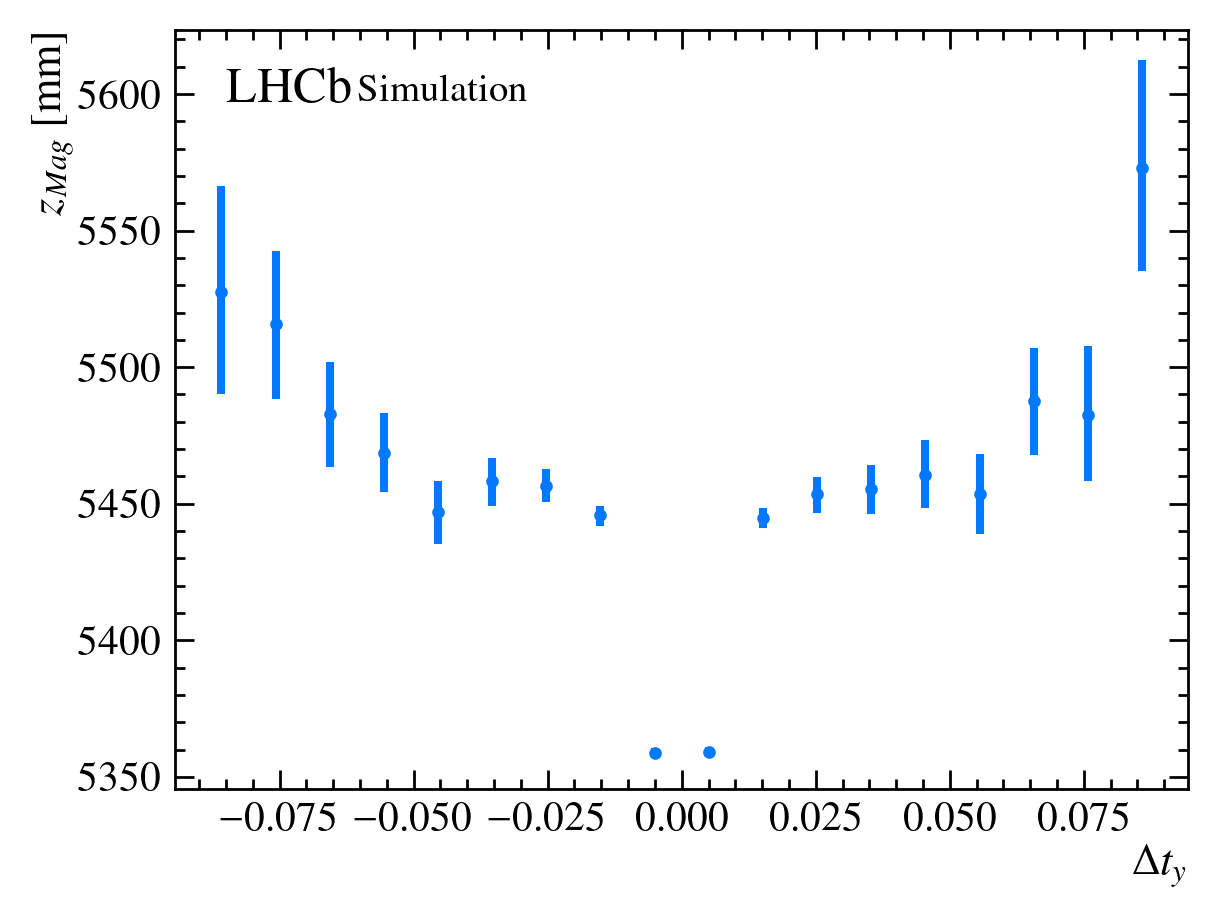

In [ ]:
bins = np.linspace(-0.5, 0.5, 100)
sns.regplot(
    x=ak.to_numpy(sel_array["dSlope_yEndT"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("$\Delta t_y$")
plt.ylabel("$z_{Mag}$ [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

features = [
    "ideal_state_770_tx",
    "dSlope_xEndT",
    "dSlope_xEndT_abs",
    "x_EndT_abs",
    "ideal_state_770_ty",
]

target_feat = "z_mag_xEndT"
order = 3

data = np.column_stack([ak.to_numpy(sel_array[feat]) for feat in features])
target = ak.to_numpy(sel_array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

poly = PolynomialFeatures(degree=order, include_bias=True)
X_train_model = poly.fit_transform(X_train)
X_test_model = poly.fit_transform(X_test)

poly_features = poly.get_feature_names_out(input_features=features)

# keep = [
#     "ideal_state_770_tx^2",
#     "dSlope_xEndT^2",
#     "dSlope_xEndT_abs",
#     "x_EndT_abs",
# ]

keep = [
    # "ideal_state_770_tx",
    # "dSlope_xEndT",
    # "ideal_state_770_ty",  # no
    # "ideal_state_770_tx x_EndT_abs",  # maybe no
    # "ideal_state_770_tx ideal_state_770_ty", # dont keep
    # "dSlope_xEndT_abs x_EndT_abs",  # dont keep
    # "ideal_state_770_tx^2 dSlope_xEndT_abs", # dont keep
    # "ideal_state_770_tx dSlope_xEndT dSlope_xEndT_abs",  # dont keep
    # "dSlope_xEndT^2 dSlope_xEndT_abs", # no
    "dSlope_xEndT_abs",  # keep
    "x_EndT_abs",  # keep
    "ideal_state_770_tx^2",  # do keep
    "ideal_state_770_tx dSlope_xEndT",  # do keep
    "dSlope_xEndT^2",  # keep
    "x_EndT_abs^2",  # do keep
    "ideal_state_770_ty^2",  # keep
    "ideal_state_770_tx^2 x_EndT_abs",  # do keep
    "ideal_state_770_tx dSlope_xEndT x_EndT_abs",  # do keep
    "dSlope_xEndT^2 x_EndT_abs",  # do keep
    "dSlope_xEndT_abs ideal_state_770_ty^2",  # maybe keep
    "x_EndT_abs^3",  # do keep
]

remove = [i for i, f in enumerate(poly_features) if f not in keep]

X_train_model = np.delete(X_train_model, remove, axis=1)
X_test_model = np.delete(X_test_model, remove, axis=1)
poly_features = np.delete(poly_features, remove)
# print(poly_features)

lin_reg = LinearRegression(fit_intercept=True)
# lin_reg = Lasso(alpha=0.00001)
# lin_reg = LassoCV()
# lin_reg = ElasticNet()
# lin_reg = Ridge(alpha=0)
lin_reg.fit(X_train_model, y_train)
y_pred_test = lin_reg.predict(X_test_model)
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly_features, lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))

intercept= 5308.975458144673
coef= {'dSlope_xEndT_abs': 84.02382370039953, 'x_EndT_abs': 0.03552632399369171, 'ideal_state_770_tx^2': 68529.10928948055, 'ideal_state_770_tx dSlope_xEndT': 60538.43896560162, 'dSlope_xEndT^2': 13284.852569734045, 'x_EndT_abs^2': -0.0008174639168529617, 'ideal_state_770_ty^2': -2163.1533980289814, 'ideal_state_770_tx^2 x_EndT_abs': -15.687680488172175, 'ideal_state_770_tx dSlope_xEndT x_EndT_abs': -13.288664637206063, 'dSlope_xEndT^2 x_EndT_abs': -3.077894760025427, 'dSlope_xEndT_abs ideal_state_770_ty^2': 3221.0446732918413, 'x_EndT_abs^3': 1.8433768191744582e-07}
r2 score= 0.8143147645331705
RMSE = 36.0572267645116


In [ ]:
koeffs = dict(zip(poly_features, lin_reg.coef_))

remove = []
for itr in koeffs.items():
    if abs(itr[1]) < 1e-4:
        remove.append(itr[0])
remove

['x_EndT_abs^3']

In [ ]:
ls_koeffs = []
for itr in koeffs.items():
    ls_koeffs.append(itr[0])
ls_koeffs

['dSlope_xEndT_abs',
 'x_EndT_abs',
 'ideal_state_770_tx^2',
 'ideal_state_770_tx dSlope_xEndT',
 'dSlope_xEndT^2',
 'x_EndT_abs^2',
 'ideal_state_770_ty^2',
 'ideal_state_770_tx^2 x_EndT_abs',
 'ideal_state_770_tx dSlope_xEndT x_EndT_abs',
 'dSlope_xEndT^2 x_EndT_abs',
 'dSlope_xEndT_abs ideal_state_770_ty^2',
 'x_EndT_abs^3']

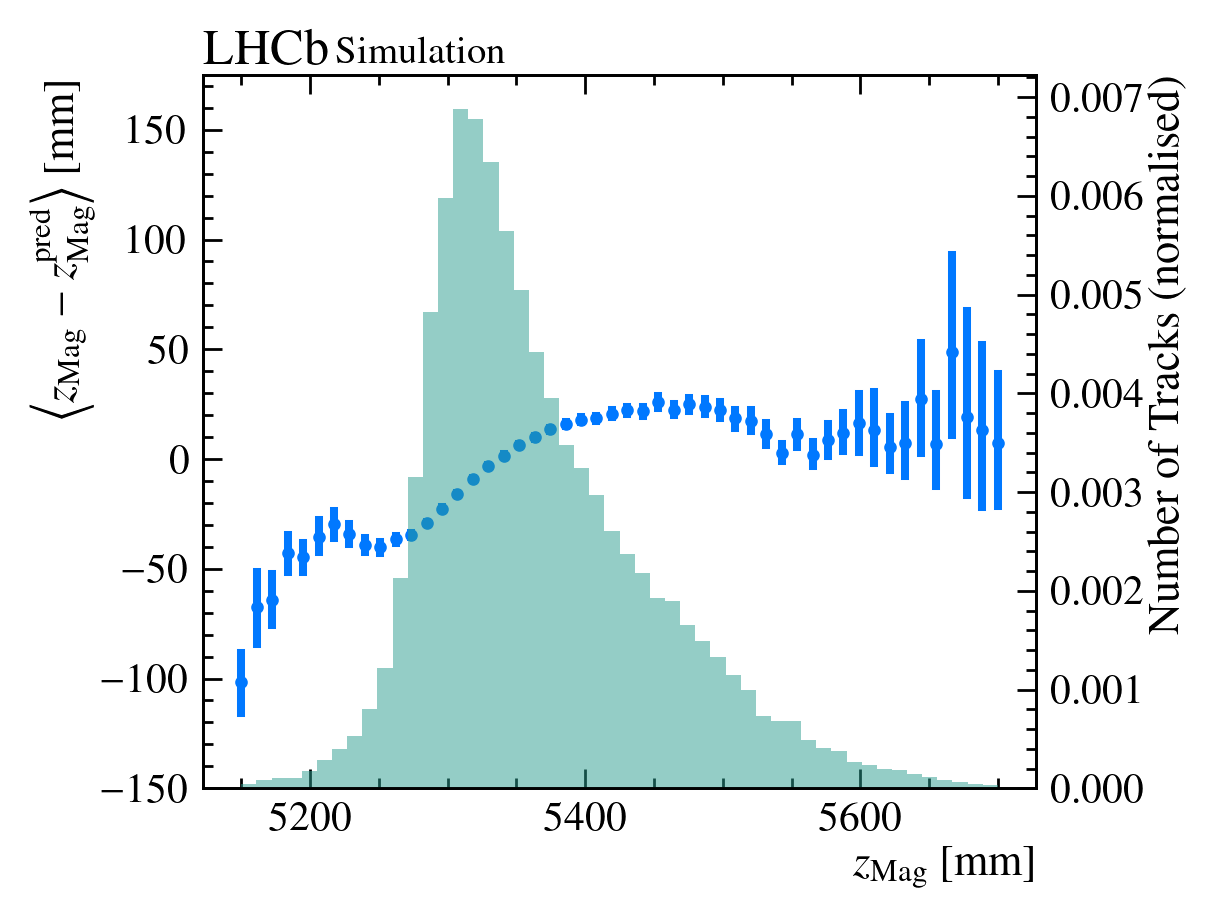

In [ ]:
bins = np.linspace(5150, 5700, 50)
ax = sns.regplot(
    x=y_test,
    y=y_test - y_pred_test,
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
    label="bla",
)
ax.set_ylim(-150, 175)
ax2 = ax.twinx()
ax2.hist(
    y_test,
    bins=50,
    range=[5150, 5700],
    color="#2A9D8F",
    alpha=0.5,
    align="mid",
    density=True,
)
ax.set_xlabel(r"$z_{\mathrm{Mag}}$ [mm]")
ax.set_ylabel(
    r"$\left\langle z_{\mathrm{Mag}}-z_{\mathrm{Mag}}^{\mathrm{pred}}\right\rangle$ [mm]"
)
ax2.set_ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/LHCb/reco_tuner/parameterisations/plots/magnet_kink_regression_plot.pdf",
#     format="PDF",
# )

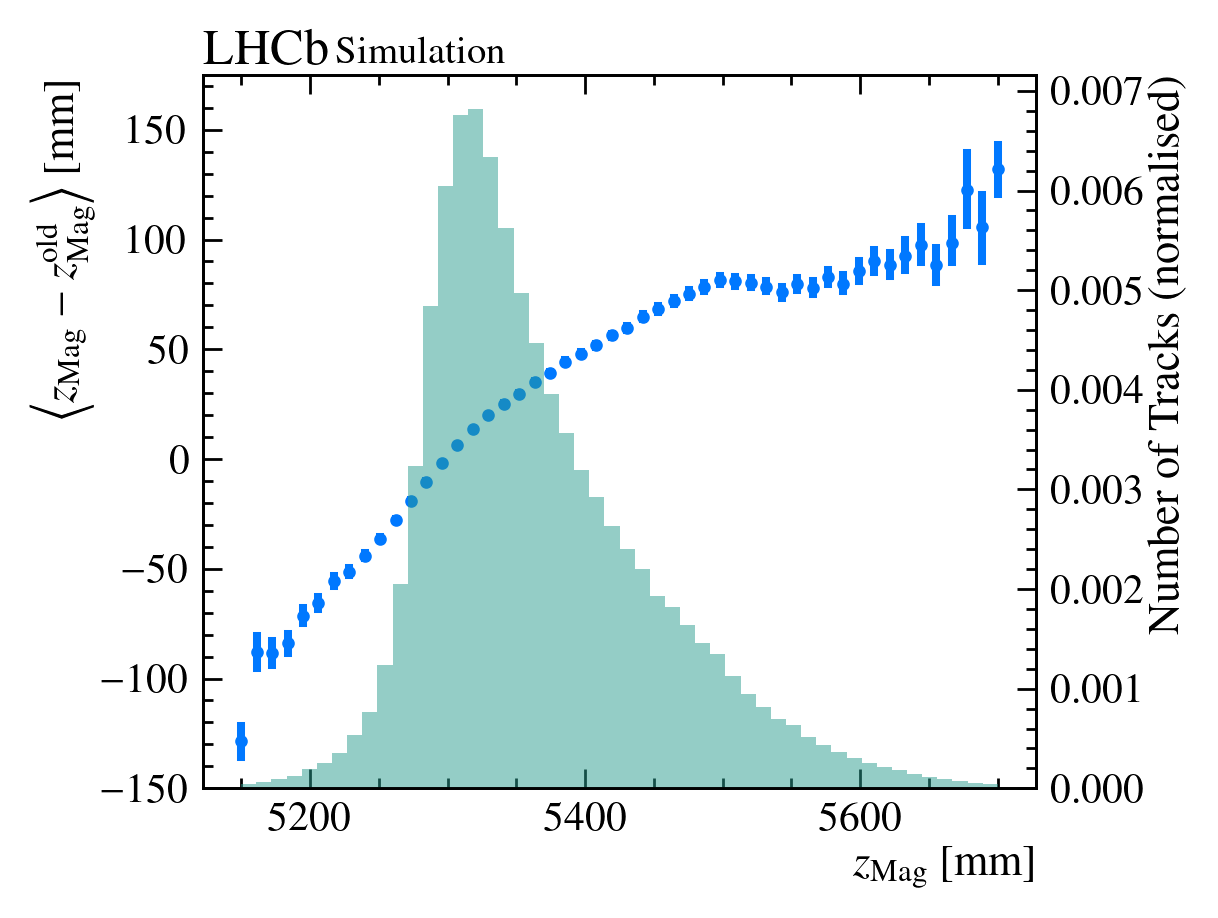

In [ ]:
bins = np.linspace(5150, 5700, 50)
ax = sns.regplot(
    x=ak.to_numpy(sel_array["z_mag_xEndT"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]) -
    ak.to_numpy(sel_array["match_zmag"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
    label="bla",
)
ax.set_ylim(-150, 175)
ax2 = ax.twinx()
ax2.hist(
    ak.to_numpy(sel_array["z_mag_xEndT"]),
    bins=50,
    range=[5150, 5700],
    color="#2A9D8F",
    alpha=0.5,
    align="mid",
    density=True,
)
ax.set_xlabel(r"$z_{\mathrm{Mag}}$ [mm]")
ax.set_ylabel(
    r"$\left\langle z_{\mathrm{Mag}}-z_{\mathrm{Mag}}^{\mathrm{old}}\right\rangle$ [mm]"
)
ax2.set_ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()
# plt.savefig(
#     "/work/cetin/LHCb/reco_tuner/parameterisations/plots/magnet_kink_old_regression_plot.pdf",
#     format="PDF",
# )

In [ ]:
plt.hist(
    ak.to_numpy(sel_array["z_mag_xEndT"]),
    bins=50,
    range=[5150, 5700],
    color="#2A9D8F",
    alpha=0.5,
    align="mid",
    density=True,
    label="True",
)
plt.hist(
    ak.to_numpy(sel_array["z_mag_xEndT"]),
    bins=50,
    range=[5150, 5700],
    color="#2A9D8F",
    alpha=0.5,
    align="mid",
    density=True,
    label="True",
)
plt.xlabel(r"$z_{\mathrm{Mag}}$ [mm]")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation", loc=0)
# plt.show()
plt.savefig(
    "/work/cetin/LHCb/reco_tuner/parameterisations/plots/magnet_kink_old_new.pdf",
    format="PDF",
)

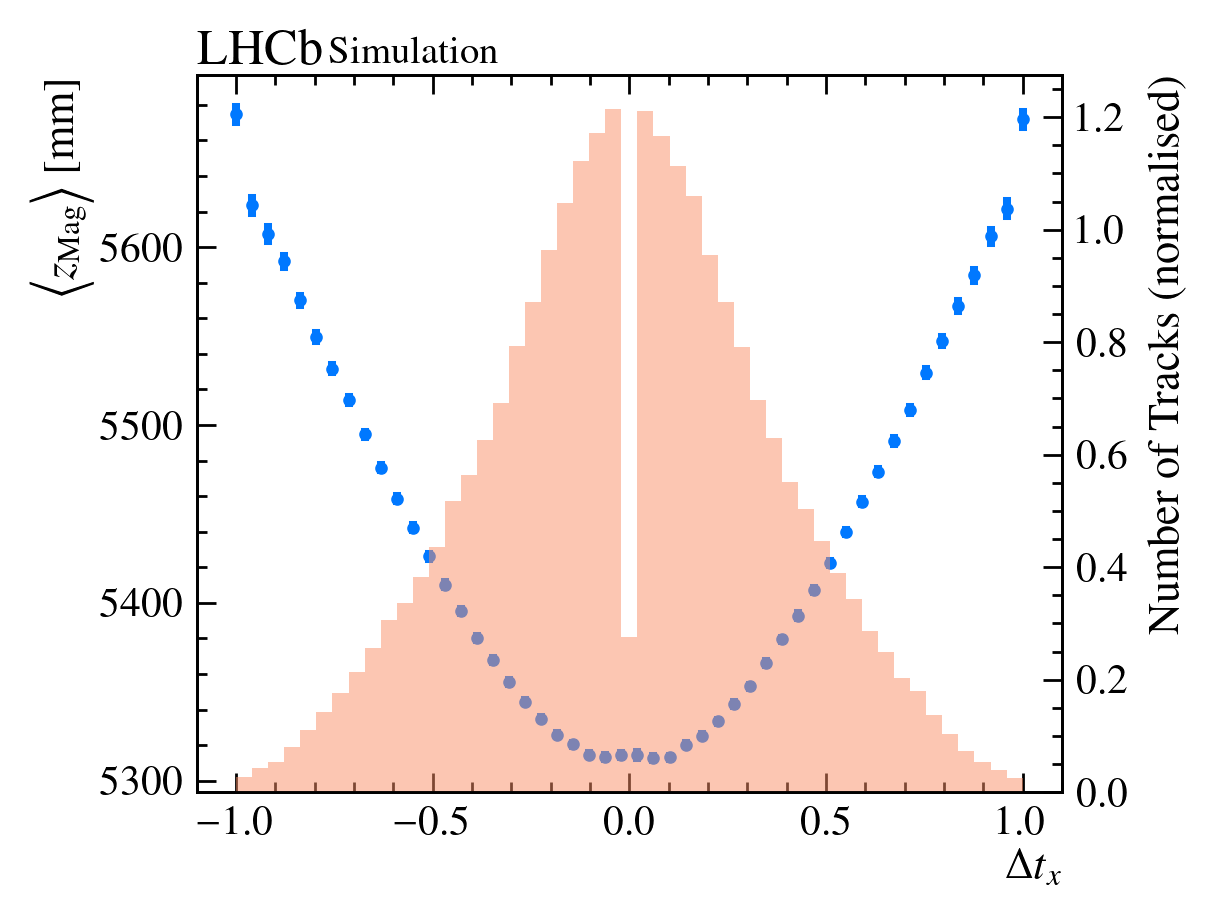

In [330]:
xlim = 1
bins = np.linspace(-xlim, xlim, 50)
ax = sns.regplot(
    x=ak.to_numpy(sel_array["dSlope_xEndT"]),
    y=ak.to_numpy(sel_array["z_mag_xEndT"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
ax2 = ax.twinx()
ax2.hist(
    ak.to_numpy(sel_array["dSlope_xEndT"]),
    bins=bins,
    color="#FB8F67",
    alpha=0.5,
    align="mid",
    density=True,
    range=[-xlim, xlim],
)
ax.set_xlabel(r"$\Delta t_x$")
ax.set_ylabel(r"$\left\langle z_{\mathrm{Mag}}\right\rangle$ [mm]")
ax2.set_ylabel(f"Number of Tracks (normalised)", labelpad=15.0)
mplhep.lhcb.text("Simulation", loc=0)
# plt.show()
plt.savefig(
    "/work/cetin/LHCb/reco_tuner/parameterisations/plots/magnet_kink_zmag_deltatx_dist.pdf",
    format="PDF",
)

In [ ]:
fig = plt.figure()
plt.hist(
    sel_array["z_mag_corr"],
    bins=100,
    # range=[5100, 5700],
    color="#2A9D8F",
    density=True,
)
plt.xlabel(r"z$_{Mag}$ correction [mm]")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-0.4, 0.4, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_tx"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(5100, 5700)
plt.xlabel("dx/dz(VELO)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-0.25, 0.25, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_ty"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(4500, 5700)

plt.xlabel("dy/dz(VELO)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-0.25, 0.25, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_9410_ty"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
# plt.ylim(4500, 5700)

plt.xlabel("dy/dz(T)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-300, 300, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["ideal_state_770_x"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("x (VELO)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(0, 500, 50)
sns.regplot(
    # x=ak.to_numpy(sel_array["ideal_state_770_y"]),
    x=ak.to_numpy(sel_array["x_EndT_abs"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("x (T)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(0, 500, 50)
sns.regplot(
    # x=ak.to_numpy(sel_array["ideal_state_770_y"]),
    x=ak.to_numpy(sel_array["y_EndVelo_abs"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("y (VELO)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(0, 500, 50)
sns.regplot(
    # x=ak.to_numpy(sel_array["ideal_state_770_y"]),
    x=ak.to_numpy(sel_array["y_EndT_abs"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("y (T)")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-1.0, 1.0, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["dSlope_xEndT"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("$\Delta t_x$")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
bins = np.linspace(-1.0, 1.0, 50)
sns.regplot(
    x=ak.to_numpy(sel_array["dSlope_yEndT_abs"]),
    y=ak.to_numpy(sel_array["z_mag_corr"]),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
)
plt.xlabel("$\Delta t_y$")
plt.ylabel("$z_{Mag}$ correction [mm]")
mplhep.lhcb.text("Simulation")
plt.show()

In [ ]:
features = [
    # # "ideal_state_770_tx",
    # "ideal_state_770_ty",
    # "ideal_state_9410_ty",
    # # "dSlope_yEndT",
    # # "dSlope_yEndT_abs",
    # # "ideal_state_770_x",
    # # "ideal_state_9410_x",
    # # "x_EndVelo_abs",
    # "y_EndVelo_abs",
    # # "y_EndT_abs",
    # "dSlope_xEndT",
    # "dSlope_xEndT_abs",
    # "x_EndT_abs",
    "ideal_state_770_tx",
    "ideal_state_770_ty",
    "ideal_state_9410_ty",
    "ideal_state_9410_tx",
    "dSlope_xEndT",
    "dSlope_xEndT_abs",
    "x_EndT_abs",
    "ideal_state_770_x",
    "x_EndVelo_abs",
]

target_feat = "z_mag_corr"
order = 4

data = np.column_stack([ak.to_numpy(sel_array[feat]) for feat in features])
target = ak.to_numpy(sel_array[target_feat])
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.1, random_state=42
)

poly = PolynomialFeatures(degree=order, include_bias=True)
X_train_model = poly.fit_transform(X_train)
X_test_model = poly.fit_transform(X_test)

poly_features = poly.get_feature_names_out(input_features=features)

# keep = [
#     "ideal_state_770_tx^2",
#     "ideal_state_770_x",
#     # "x_EndVelo_abs",
#     "dSlope_xEndT^2",
#     "dSlope_xEndT_abs",
#     "x_EndT_abs",
# ]
# remove = [i for i, f in enumerate(poly_features) if f not in keep]
# remove_term = [
#     "ideal_state_770_x^2 ideal_state_9410_x",
# ]
# remove = [i for i, f in enumerate(poly_features) if f in remove_term]

# X_train_model = np.delete(X_train_model, remove, axis=1)
# X_test_model = np.delete(X_test_model, remove, axis=1)
# poly_features = np.delete(poly_features, remove)
# print(poly_features)

# lin_reg = LinearRegression()
lin_reg = Lasso(alpha=0.1, max_iter=2000)
# lin_reg = LassoCV()
# lin_reg = ElasticNet(alpha=1)
# lin_reg = Ridge(alpha=1)
lin_reg.fit(X_train_model, y_train)
y_pred_test = lin_reg.predict(X_test_model)
print("intercept=", lin_reg.intercept_)
print("coef=", dict(zip(poly_features, lin_reg.coef_)))
print("r2 score=", lin_reg.score(X_test_model, y_test))
print("RMSE =", mean_squared_error(y_test, y_pred_test, squared=False))

In [ ]:
bins = np.linspace(-200, 200, 50)
ax = sns.regplot(
    x=y_test,
    y=abs(y_test - y_pred_test),
    x_bins=bins,
    fit_reg=None,
    x_estimator=np.mean,
    label="bla",
)
ax2 = ax.twinx()
ax2.hist(y_test, bins=30, range=[-200, 200], color="#2A9D8F", alpha=0.8, align="left")
ax.set_xlabel(r"z$_{Mag}$ correction [mm]")
ax.set_ylabel("Mean Deviation [mm]")
ax2.set_ylabel("Number of Tracks")
mplhep.lhcb.text("Simulation", loc=0)
plt.show()